In [3]:
import pandas as pd
import json
with open('StreamingHistory_music_0.json','r',encoding='utf-8') as f :
    data=json.load(f)
df=pd.DataFrame(data)
df.head()


,endTime,artistName,trackName,msPlayed
0,2024-11-25 13:17,Sublime Subliminals,"Big Hips,Big Butt, Slim Waist",4650
1,2025-01-17 08:26,ENHYPEN,No Doubt,146704
2,2025-01-17 08:26,aespa,UP - KARINA Solo,0
3,2025-01-17 08:28,ROSÉ,toxic till the end,116509
4,2025-01-17 08:30,KISS OF LIFE,Igloo,123866


In [4]:
len(df)

1181

In [5]:
df.columns

Index(['endTime', 'artistName', 'trackName', 'msPlayed'], dtype='object')

In [6]:
df['endTime'] = pd.to_datetime(df['endTime'])


In [7]:
df['minutesPlayed'] = df['msPlayed'] / 60000


In [8]:
df = df[df['minutesPlayed'] > 0.5]


In [9]:
top_artists = (
    df.groupby('artistName')['minutesPlayed']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

top_artists


artistName
aespa                  141.006433
i-dle                  132.190800
JENNIE                 108.816300
LE SSERAFIM            101.834733
ILLIT                  101.832733
ENHYPEN                 86.377433
TOMORROW X TOGETHER     82.174183
Ariana Grande           63.142750
The Weeknd              57.091200
IVE                     50.731167
Name: minutesPlayed, dtype: float64

In [10]:
top_songs = df['trackName'].value_counts().head(10)
top_songs


trackName
Igloo                                 14
Miniskirt                             13
You & Me (Coachella ver.)             12
Tick-Tack                             12
Cherish (My Love)                     11
Love Hangover (feat. Dominic Fike)     9
DAHLIA                                 9
No Doubt                               8
Flowers                                8
PUSH 2 START                           8
Name: count, dtype: int64

In [11]:
df['hour'] = df['endTime'].dt.hour
df['day'] = df['endTime'].dt.day_name()


In [12]:
df['hour'].value_counts().sort_index()


hour
2     14
3     76
4     62
5     10
6     25
7     84
8     90
9     59
10    39
11    19
12    19
13    19
14    37
15    39
16    21
17    33
18    41
19    43
20    32
21    20
Name: count, dtype: int64

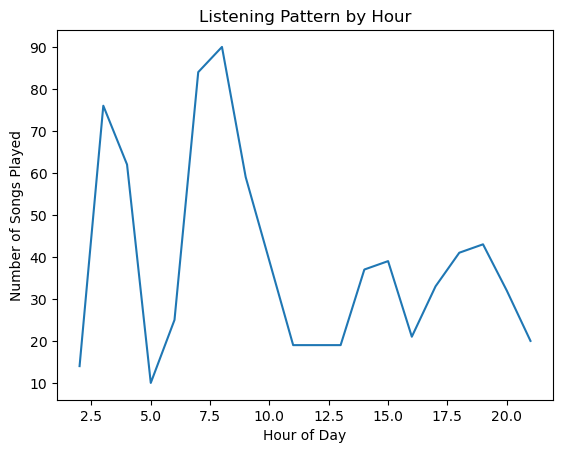

In [13]:
import matplotlib.pyplot as plt

df['hour'].value_counts().sort_index().plot(kind='line')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Songs Played")
plt.title("Listening Pattern by Hour")
plt.show()


In [14]:
df['hour'] = df['endTime'].dt.hour
df['day'] = df['endTime'].dt.day_name()
df['month'] = df['endTime'].dt.month_name()


In [15]:
top_artists = (
    df.groupby('artistName')['minutesPlayed']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

top_artists


artistName
aespa                  141.006433
i-dle                  132.190800
JENNIE                 108.816300
LE SSERAFIM            101.834733
ILLIT                  101.832733
ENHYPEN                 86.377433
TOMORROW X TOGETHER     82.174183
Ariana Grande           63.142750
The Weeknd              57.091200
IVE                     50.731167
Name: minutesPlayed, dtype: float64

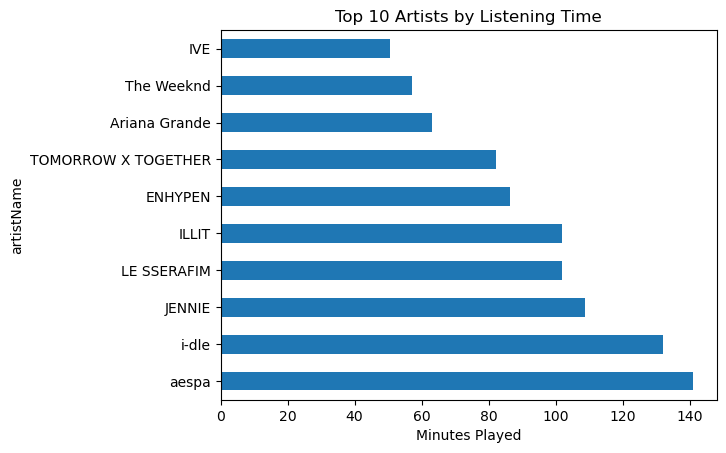

In [16]:
import matplotlib.pyplot as plt

top_artists.plot(kind='barh')
plt.title("Top 10 Artists by Listening Time")
plt.xlabel("Minutes Played")
plt.show()


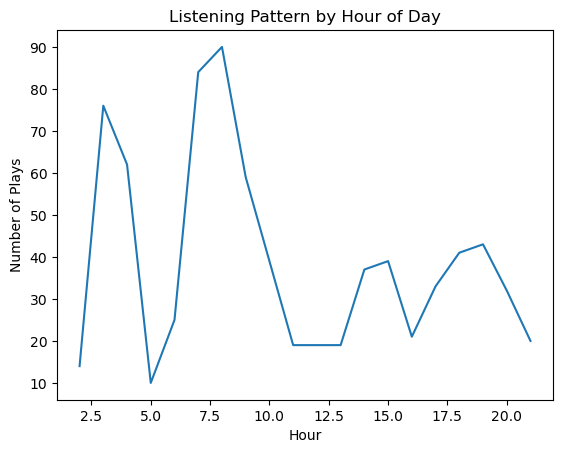

In [17]:
df['hour'].value_counts().sort_index().plot(kind='line')
plt.title("Listening Pattern by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Plays")
plt.show()


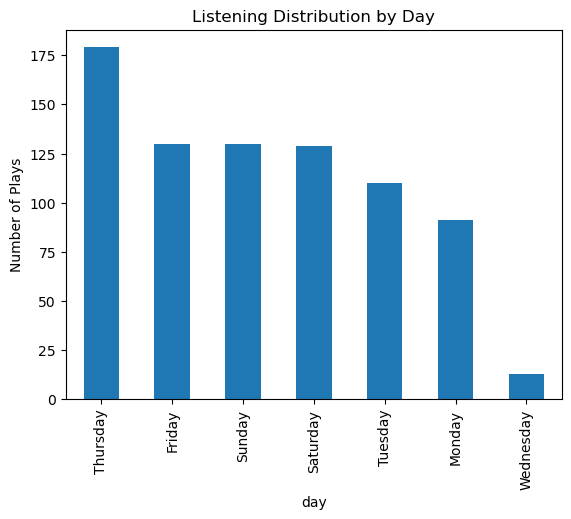

In [18]:
df['day'].value_counts().plot(kind='bar')
plt.title("Listening Distribution by Day")
plt.ylabel("Number of Plays")
plt.show()


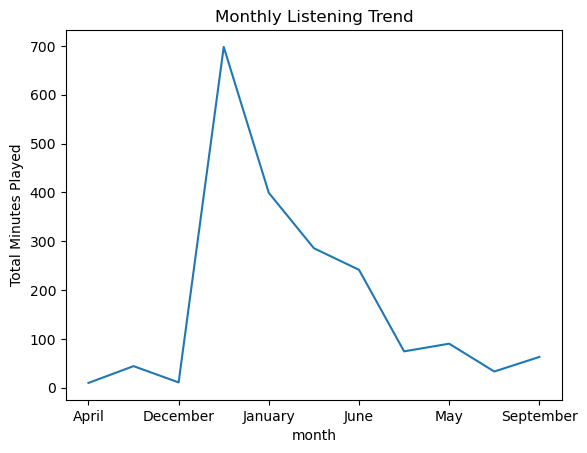

In [19]:
df.groupby('month')['minutesPlayed'].sum().plot(kind='line')
plt.title("Monthly Listening Trend")
plt.ylabel("Total Minutes Played")
plt.show()


In [20]:
df['time_period'] = df['hour'].apply(
    lambda x: 'Day' if 6 <= x < 18 else 'Night'
)


In [21]:
X = df[['minutesPlayed', 'hour']]
y = df['time_period']


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


0.5987261146496815

In [23]:
plt.savefig("top_artists.png", bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [24]:
df['time_period'] = df['endTime'].dt.hour.apply(
    lambda x: 1 if 6 <= x < 18 else 0   # 1 = Day, 0 = Night
)


In [25]:
X = df[['minutesPlayed']]
y = df['time_period']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # keeps day/night balance
)


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_leaf=10,
    random_state=42
)

rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

print(classification_report(y_test, y_pred))


Accuracy: 58.6 %
              precision    recall  f1-score   support

           0       0.38      0.13      0.20        60
           1       0.62      0.87      0.72        97

    accuracy                           0.59       157
   macro avg       0.50      0.50      0.46       157
weighted avg       0.53      0.59      0.52       157



In [28]:
X = df[['minutesPlayed']]
y = df['time_period']


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)


,loss,'log_loss'
,learning_rate,0.05
,n_estimators,150
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [31]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = gb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

print(classification_report(y_test, y_pred))


Accuracy: 60.51 %
              precision    recall  f1-score   support

           0       0.44      0.13      0.21        60
           1       0.63      0.90      0.74        97

    accuracy                           0.61       157
   macro avg       0.54      0.52      0.47       157
weighted avg       0.56      0.61      0.53       157

